# 财务分析

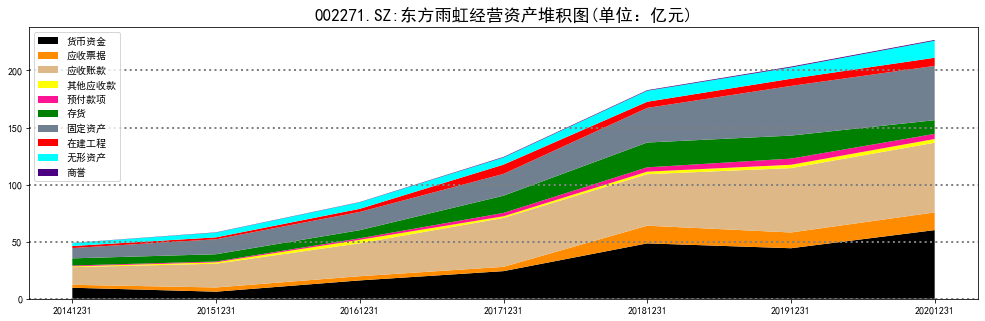

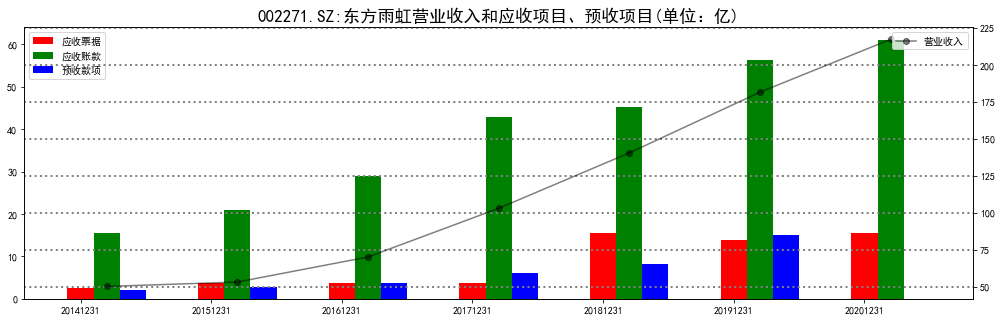

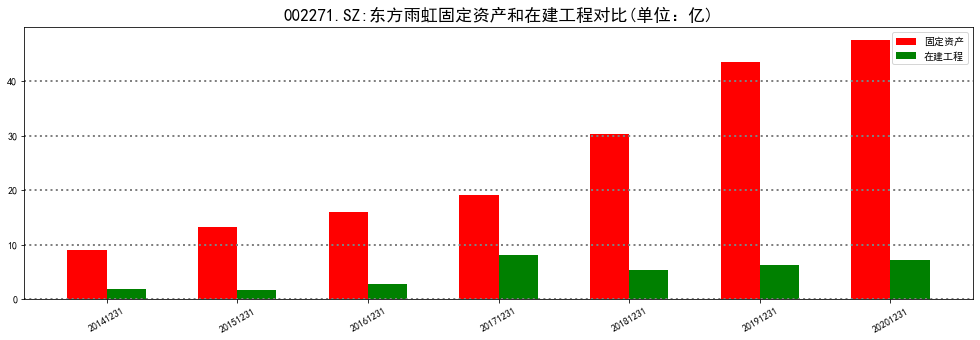

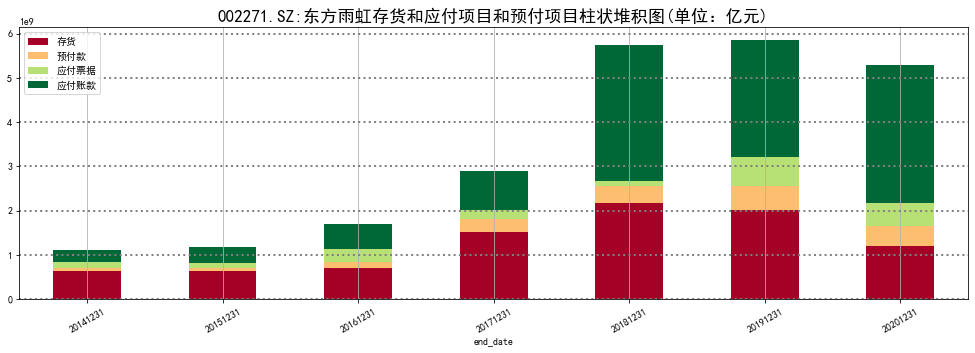

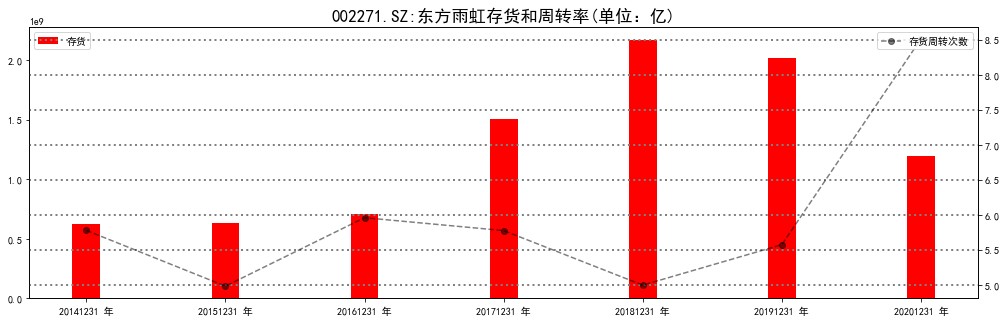

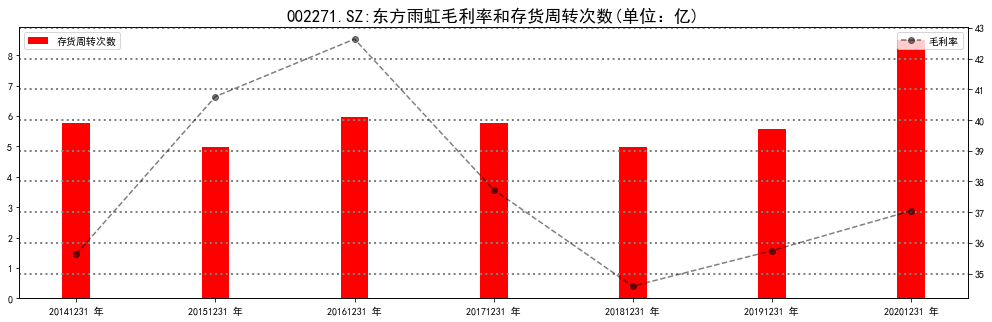

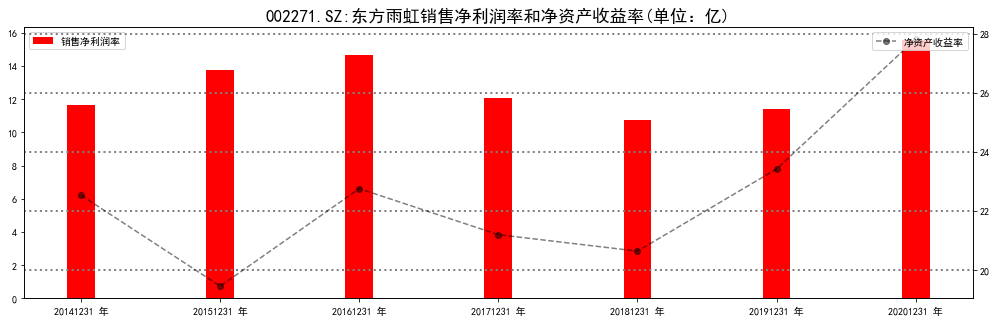

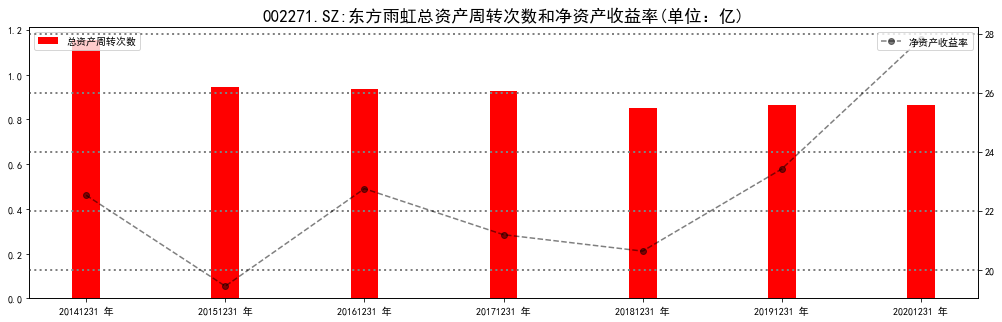

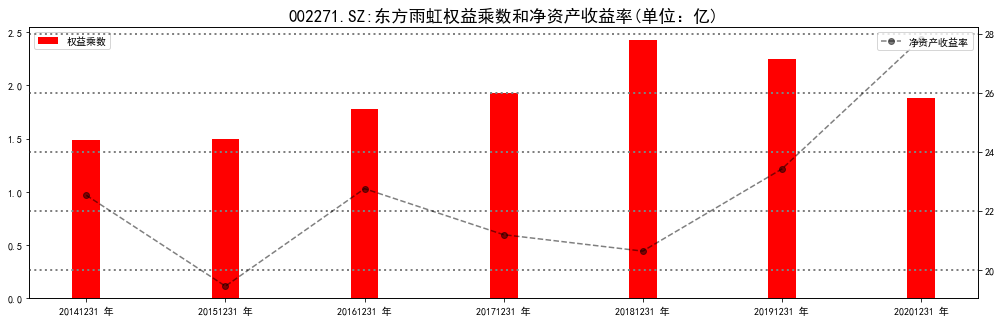

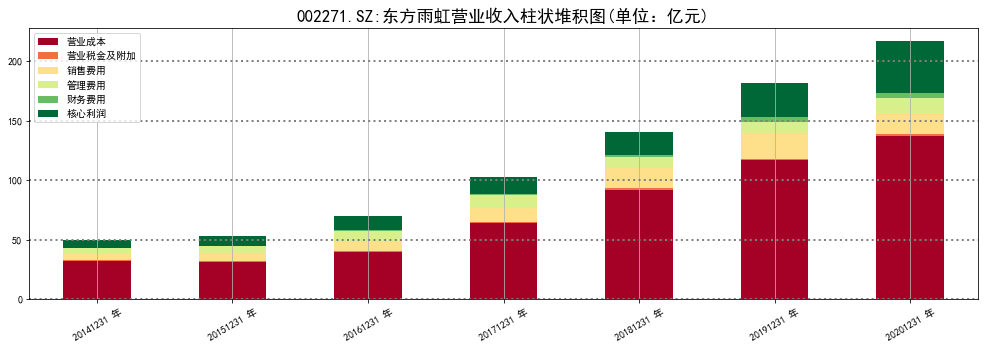

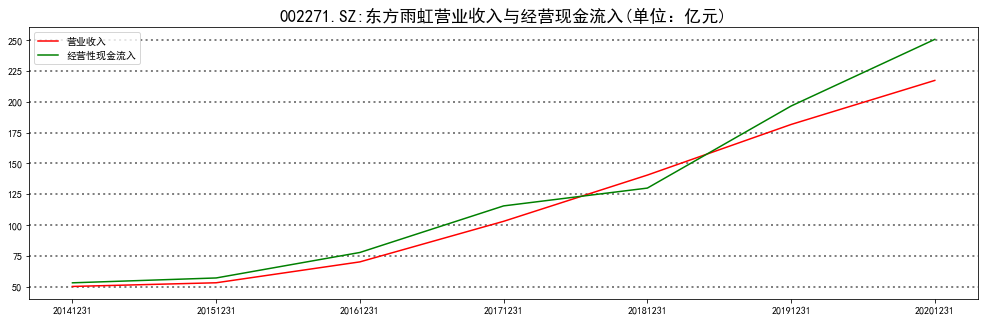

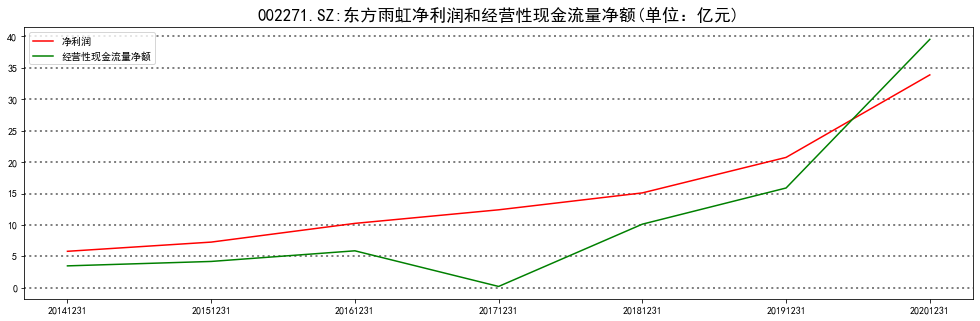

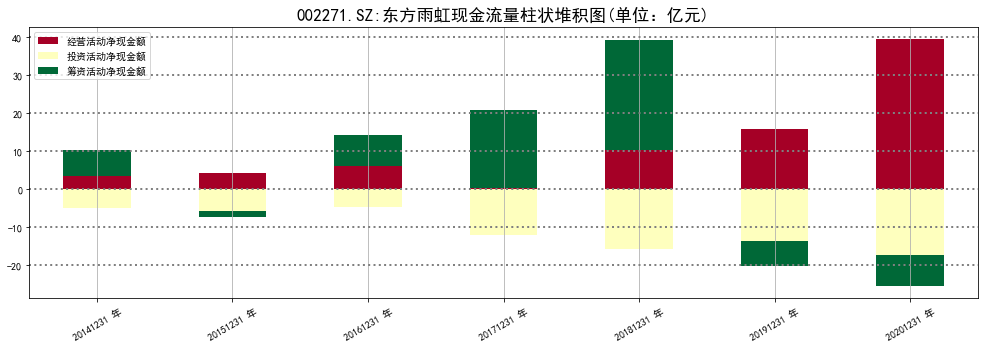

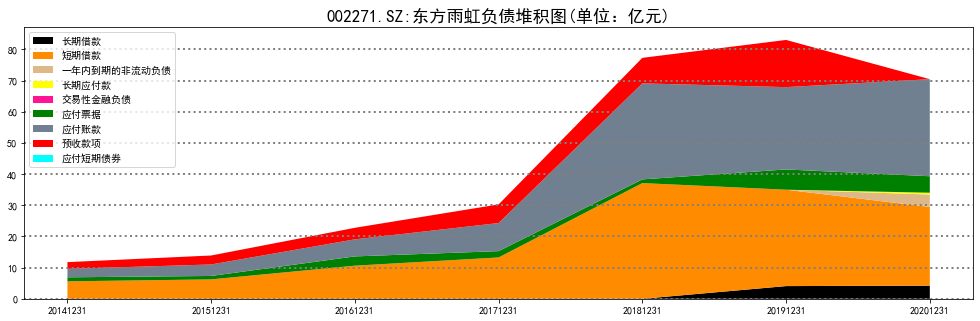

In [1]:
import pandas as pd 
import tushare as ts 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.ticker as ticker

plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签
plt.rcParams['axes.unicode_minus']=False


class DataHandler:
    def __init__(self,ts_code,start_date,end_date,report_type=1):
        self.ts_code =  ts_code
        self.start_date = start_date
        self.end_date = end_date
        self.report_type = report_type
        self.pro = ts.pro_api()
        self.load_data()
        self.money_cap = 0
        self.notes_receiv =0
        self.accounts_receiv = 0 
        self.oth_receiv = 0
        self.prepayment = 0
        self.inventories = 0
        self.fix_assets = 0
        self.cip = 0
        self.intan_assets = 0
        self.goodwill = 0 
        self.notes_payable = 0
        self.acct_payable = 0
        self.adv_receipts = 0
        self.revenue = 0  
        self.inv_turn = 0 
        self.grossprofit_margin = 0 
        self.roe = 0
        self.roe_waa = 0
        self.roe_dt = 0 
        self.netprofit_margin = 0
        self.assets_turn = 0
        self.assets_to_eqt = 0         
        self.frame = pd.DataFrame()
        self.load_data()  
        self.plot_1()
        self.plot_2()
        self.plot_3()
        self.plot_4()
        self.plot_5()
        self.plot_6()
        self.plot_7()
        self.plot_8()
        self.plot_9()
        self.plot_10()
        self.plot_11()
        self.plot_12()
        self.plot_13()
        self.plot_14()

    def load_data(self):
        """
        调用tushare接口，读取四张表，拼装DataFrame
        """
        df_bal = self.pro.balancesheet(ts_code=self.ts_code,start_date=self.start_date,end_date=self.end_date,report_type=self.report_type,\
                                       fields='ts_code,ann_date,f_ann_date,end_date,report_type,comp_type,\
                      money_cap,notes_receiv,accounts_receiv,oth_receiv,prepayment,\
                      inventories,fix_assets,cip,intan_assets,goodwill, notes_payable,acct_payable,adv_receipts,\
                      lt_borr,st_borr,non_cur_liab_due_1y,lt_payable,trading_fl,st_bonds_payable')
        df_bal = df_bal.drop_duplicates(subset= ['end_date'], keep='first', inplace=False)
        df_bal = df_bal[df_bal['end_date'].str.endswith('1231')]
        df_bal = df_bal.sort_values(by='end_date')        
        df_bal = df_bal.fillna(0)
        df_bal.set_index('end_date',inplace=True)
        cols= ['money_cap','notes_receiv','accounts_receiv','oth_receiv','prepayment','inventories','fix_assets','cip','intan_assets','goodwill',\
              'notes_payable','acct_payable','adv_receipts','lt_borr','st_borr','non_cur_liab_due_1y','lt_payable','trading_fl','st_bonds_payable']
        df_bal = df_bal.loc['20141231':,cols]
        
        
        df_inc = self.pro.income(ts_code=self.ts_code,start_date=self.start_date,\
                                 end_date=self.end_date,fields='ts_code,ann_date,f_ann_date,end_date,report_type,comp_type,revenue,oper_cost,\
                sell_exp,admin_exp,fin_exp,biz_tax_surchg')
        df_inc = df_inc.drop_duplicates(subset= ['end_date'], keep='first', inplace=False)
        df_inc = df_inc[df_inc['end_date'].str.endswith('1231')]
        df_inc = df_inc.sort_values(by='end_date')        
        df_inc = df_inc.fillna(0)
        df_inc.set_index('end_date',inplace=True)
        cols= ['revenue','oper_cost','sell_exp','admin_exp','fin_exp','biz_tax_surchg']
        df_inc = df_inc.loc['20141231':,cols]
        
        df_cash = self.pro.cashflow(ts_code=self.ts_code,start_date=self.start_date,\
                                    end_date=self.end_date,fields='ts_code,ann_date,f_ann_date,end_date,report_type,comp_type,\
                net_profit,c_fr_sale_sg,n_cashflow_act,n_cashflow_inv_act,n_cash_flows_fnc_act')
        df_cash = df_cash.drop_duplicates(subset= ['end_date'], keep='first', inplace=False)                               
        df_cash = df_cash[df_cash['end_date'].str.endswith('1231')]
        df_cash = df_cash.sort_values(by='end_date') 
        df_cash = df_cash.fillna(0)
        df_cash.set_index('end_date',inplace=True)
        cols = ['net_profit','c_fr_sale_sg','n_cashflow_act','n_cashflow_inv_act','n_cash_flows_fnc_act']
        df_cash = df_cash.loc['20141231':,cols]
        #start_date参数提前一年，对齐数据
        df_ratio = self.pro.query('fina_indicator', ts_code=self.ts_code,start_date='20140101',\
                                  end_date=self.end_date,fields='ts_code,ann_date,\
                                    end_date,inv_turn,grossprofit_margin,roe,roe_waa,roe_dt,roa,netprofit_margin,assets_turn,assets_to_eqt')
        df_ratio = df_ratio.drop_duplicates(subset= ['end_date'], keep='first', inplace=False)                               
        df_ratio = df_ratio[df_ratio['end_date'].str.endswith('1231')]
        df_ratio = df_ratio.sort_values(by='end_date') 
        df_ratio = df_ratio.fillna(0)
        df_ratio.set_index('end_date',inplace=True)
        cols = ['inv_turn','grossprofit_margin','roe','netprofit_margin','assets_turn','assets_to_eqt']
        df_ratio = df_ratio.loc['20141231':,cols]
#         print(df_ratio )
        
        self.frame= pd.concat([df_bal,df_inc,df_cash,df_ratio],axis=1)
        
        self.money_cap = self.frame.money_cap  / 100000000
        self.notes_receiv = self.frame.notes_receiv  / 100000000
        self.accounts_receiv = self.frame.accounts_receiv  / 100000000
        self.oth_receiv = self.frame.oth_receiv  / 100000000
        self.prepayment = self.frame.prepayment  / 100000000
        self.inventories = self.frame.inventories  / 100000000
        self.fix_assets = self.frame.fix_assets  / 100000000
        self.cip = self.frame.cip  / 100000000
        self.intan_assets = self.frame.intan_assets  / 100000000
        self.goodwill =self.frame.goodwill  / 100000000
        self.notes_payable = self.frame.notes_payable / 100000000
        self.acct_payable = self.frame.acct_payable / 100000000
        self.adv_receipts = self.frame.adv_receipts / 100000000
        self.revenue =  self.frame.revenue / 100000000
        self.c_fr_sale_sg = self.frame.c_fr_sale_sg / 100000000
        self.net_profit = self.frame.net_profit/ 100000000        
        self.n_cashflow_act = self.frame.n_cashflow_act/ 100000000
        
        self.lt_borr = self.frame.lt_borr / 100000000
        self.st_borr = self.frame.st_borr / 100000000
        self.non_cur_liab_due_1y = self.frame.non_cur_liab_due_1y / 100000000
        self.lt_payable = self.frame.lt_payable / 100000000
        self.trading_fl = self.frame.trading_fl / 100000000
        self.st_bonds_payable = self.frame.st_bonds_payable / 100000000
               
        self.inv_turn = self.frame.inv_turn
        self.grossprofit_marginn = self.frame.grossprofit_margin
        self.roe = self.frame.roe
        self.netprofit_margin = self.frame.netprofit_margin
        self.assets_turn = self.frame.assets_turn
        self.assets_to_eqt = self.frame.assets_to_eqt
        self.oper_cost = self.frame / 100000000
#         print(self.frame)        
        
    def plot_1(self):
        """
        经营资产堆积图
        """
        str_name = self.code2name()
        x = self.frame.index       
        
        fig = plt.figure(figsize=(17, 5))
        plt.stackplot(x, self.money_cap,self.notes_receiv,self.accounts_receiv,self.oth_receiv, self.prepayment,\
              self.inventories,self.fix_assets,self.cip,self.intan_assets,self.goodwill,\
              baseline='zero',\
              labels=['货币资金', '应收票据', '应收账款','其他应收款','预付款项','存货','固定资产','在建工程','无形资产','商誉'],\
              colors=['black','darkorange','burlywood','yellow','deeppink','g','slategrey','red','cyan','indigo'])
        plt.legend(loc='upper left')
        plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)
        plt.title(self.ts_code+':'+str_name+'经营资产堆积图(单位：亿元)',fontsize='xx-large',fontweight='heavy')
        plt.savefig('1.经营资产堆积图.png')
        plt.show() 
    def plot_2(self):
        """
        营业收入、应收项目、预收项目对比        """        
        str_name = self.code2name()
        bar_width = 0.2  # 条形宽度
        fig,ax= plt.subplots(1,1,figsize=(17,5))
        x1 = np.arange(len(self.frame.index))
        x2 = x1 + bar_width
        x3 = x2 + bar_width
        
        
        ax.bar(x1, height=self.notes_receiv, width=bar_width, color='r', label='应收票据')
        ax.bar(x2, height=self.accounts_receiv, width=bar_width, color='g', label='应收账款')
        ax.bar(x3, height=self.adv_receipts, width=bar_width, color='b', label='预收款项')
        plt.legend(loc='upper left') 
        ax1 = ax.twinx()
        ax1.plot(x2, self.revenue,'k-o',alpha=0.5,label='营业收入')
#         ax1.set_ylim([30,175])

#         ax.set_xticklabels(self.frame.index,rotation=30)
#         ax.set_xticks(x2)
        ax.xaxis.set_major_locator(ticker.FixedLocator(x1))
        ax.xaxis.set_major_formatter(ticker.FixedFormatter(self.frame.index))
        
        plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)
        plt.legend(loc='upper right')  # 显示图例
        plt.title(self.ts_code+':'+str_name+'营业收入和应收项目、预收项目(单位：亿)',fontsize='xx-large',fontweight='heavy')  # 图形标题
        plt.savefig('2.营业收入和应收项目、预收项目.png')
        plt.show()  
        
    def plot_3(self):
        """
        固定资产和在建工程对比
        """
        str_name = self.code2name()
        x = self.frame.index       
        bar_width = 0.3  # 条形宽度
        fig = plt.figure(figsize=(17, 5))
        x1 =  np.arange(len(self.frame.index))
        x2 = x1 + bar_width
        
        plt.bar(x1, height=self.fix_assets, width=bar_width, color='r', label='固定资产')
        plt.bar(x2, height=self.cip, width=bar_width, color='g', label='在建工程')
        plt.legend()  # 显示图例
        plt.xticks(x1+ bar_width/2, x,rotation=30)        
        plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)

        plt.title(self.ts_code+':'+str_name+'固定资产和在建工程对比(单位：亿)',fontsize='xx-large',fontweight='heavy')  # 图形标题 
        plt.savefig('3.固定资产和在建工程对比.png')
        plt.show()
    def plot_4(self):
        """
        存货和应付项目、预付项目对比
        """
        str_name = self.code2name()
        fig,ax  = plt.subplots(figsize=(17,5))
        cmap = cm.get_cmap('RdYlGn')
        frame = self.frame.loc[:,['inventories','prepayment','notes_payable','acct_payable']]
        frame.columns = ['存货', '预付款', '应付票据', '应付账款']
        frame.plot(kind='bar',grid = True,colormap=cmap,stacked=True,ax=ax,rot=30)

        plt.legend(loc='upper left')
        plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)
        plt.title(self.ts_code+':'+str_name+'存货和应付项目和预付项目柱状堆积图(单位：亿元)',fontsize='xx-large',fontweight='heavy')
        plt.savefig('4.固定资产和在建工程对比.png')
        plt.show() 
        
    def plot_5(self):
        """
        存货及其周转率
        """
        str_name = self.code2name()
        frame = frame = self.frame.loc[:,['inventories','inv_turn']]
        frame.columns = ['存货', '存货周转次数']                
        xlabels= frame.index.to_list()
        xlabels = ['%s 年' % x for x in xlabels]
        x1 = np.arange(len(xlabels))
        y1 = frame['存货'].to_list()
        y2 = frame['存货周转次数'].to_list()
        fig,ax= plt.subplots(1,1,figsize=(17,5))
        
        bar_width = 0.2  # 条形宽度
        ax.bar(x1, height=y1, color='r', label='存货',width=bar_width)
#         ax.set_xticklabels(xlabels,rotation=30)
#         ax.set_xticks(x1)
        ax.xaxis.set_major_locator(ticker.FixedLocator(x1))
        ax.xaxis.set_major_formatter(ticker.FixedFormatter(xlabels))
        
        plt.legend(loc='upper left') 
        ax1 = ax.twinx()
        ax1.plot(x1,y2,'k--o',alpha=0.5,label='存货周转次数',)
#         ax1.set_ylim([6,13]) 
        
        plt.legend(loc='upper right')  # 显示图例
        plt.title(self.ts_code+':'+str_name+'存货和周转率(单位：亿)',fontsize='xx-large',fontweight='heavy')  # 图形标题
        plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)
        plt.savefig('5.存货和周转率.png')
        plt.show()
    def plot_6(self):
        """
        毛利率和存货周转次数
        """
        str_name = self.code2name()
        frame = frame = self.frame.loc[:,['grossprofit_margin','inv_turn']]
        frame.columns = ['毛利率', '存货周转次数']                
        xlabels= frame.index.to_list()
        xlabels = ['%s 年' % x for x in xlabels]
        x1 = np.arange(len(xlabels))
        y1 = frame['存货周转次数'].to_list()
        y2 = frame['毛利率'].to_list()
        fig,ax= plt.subplots(1,1,figsize=(17,5))
        
        bar_width = 0.2  # 条形宽度
        ax.bar(x1, height=y1, color='r', label='存货周转次数',width=bar_width)
#         ax.set_xticklabels(xlabels,rotation=30) 
#         ax.set_xticks(x1)

        plt.legend(loc='upper left') 
        ax1 = ax.twinx()
        ax1.plot(x1,y2,'k--o',alpha=0.5,label='毛利率',)
#         ax1.set_ylim([6,13]) 
        ax.xaxis.set_major_locator(ticker.FixedLocator(x1))
        ax.xaxis.set_major_formatter(ticker.FixedFormatter(xlabels))
        
        plt.legend(loc='upper right')  # 显示图例
        plt.title(self.ts_code+':'+str_name+'毛利率和存货周转次数(单位：亿)',fontsize='xx-large',fontweight='heavy')  # 图形标题
        plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)
        plt.savefig('6.毛利率和存货周转次数.png')
        plt.show()  
        
    def plot_7(self):
        """
        销售净利润率和净资产收益率
        """
        str_name = self.code2name()
        frame = self.frame.loc[:,['roe','netprofit_margin']]
        frame.columns = ['净资产收益率', '销售净利润率']                
        xlabels= frame.index.to_list()
        xlabels = ['%s 年' % x for x in xlabels]
        x1 = np.arange(len(xlabels))
        y1 = frame['销售净利润率'].to_list()
        y2 = frame['净资产收益率'].to_list()
        fig,ax= plt.subplots(1,1,figsize=(17,5))
        
        bar_width = 0.2  # 条形宽度
        ax.bar(x1, height=y1, color='r', label='销售净利润率',width=bar_width)
#         ax.set_xticklabels(xlabels,rotation=30)  
#         ax.set_xticks(x1)
        ax.xaxis.set_major_locator(ticker.FixedLocator(x1))
        ax.xaxis.set_major_formatter(ticker.FixedFormatter(xlabels))
        plt.legend(loc='upper left') 
        ax1 = ax.twinx()
        ax1.plot(x1,y2,'k--o',alpha=0.5,label='净资产收益率',)
#         ax1.set_ylim([6,13]) 
        
        plt.legend(loc='upper right')  # 显示图例
        plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)
        plt.title(self.ts_code+':'+str_name+'销售净利润率和净资产收益率(单位：亿)',fontsize='xx-large',fontweight='heavy')  # 图形标题
        plt.savefig('7.销售净利润率和净资产收益率.png')
        plt.show()  
        
    def plot_8(self):
        """
        总资产周转次数和净资产收益率
        """
        str_name = self.code2name()
        frame = self.frame.loc[:,['assets_turn','roe']]
        frame.columns = ['总资产周转次数', '净资产收益率']                
        xlabels= frame.index.to_list()
        xlabels = ['%s 年' % x for x in xlabels]
        x1 = np.arange(len(xlabels))
        y1 = frame['总资产周转次数'].to_list()
        y2 = frame['净资产收益率'].to_list()
        fig,ax= plt.subplots(1,1,figsize=(17,5))
        
        bar_width = 0.2  # 条形宽度
        ax.bar(x1, height=y1, color='r', label='总资产周转次数',width=bar_width)
#         ax.set_xticklabels(xlabels,rotation=30)       
#         ax.set_xticks(x1)
        ax.xaxis.set_major_locator(ticker.FixedLocator(x1))
        ax.xaxis.set_major_formatter(ticker.FixedFormatter(xlabels))
        plt.legend(loc='upper left') 
        ax1 = ax.twinx()
        ax1.plot(x1,y2,'k--o',alpha=0.5,label='净资产收益率',)
#         ax1.set_ylim([6,13]) 
        
        plt.legend(loc='upper right')  # 显示图例
        plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)
        plt.title(self.ts_code+':'+str_name+'总资产周转次数和净资产收益率(单位：亿)',fontsize='xx-large',fontweight='heavy')  # 图形标题
        plt.savefig('8.总资产周转次数和净资产收益率.png')
        plt.show()  
        
    def plot_9(self):
        """
        权益乘数和净资产收益率
        """
        str_name = self.code2name()
        frame = self.frame.loc[:,['assets_to_eqt','roe']]
        frame.columns = ['权益乘数', '净资产收益率']                
        xlabels= frame.index.to_list()
        xlabels = ['%s 年' % x for x in xlabels]
        x1 = np.arange(len(xlabels))
        y1 = frame['权益乘数'].to_list()
        y2 = frame['净资产收益率'].to_list()
        fig,ax= plt.subplots(1,1,figsize=(17,5))
        
        bar_width = 0.2  # 条形宽度
        ax.bar(x1, height=y1, color='r', label='权益乘数',width=bar_width)
#         ax.set_xticklabels(xlabels,rotation=30)   
# #         ax.set_ylim([1,4]) 

#         ax.set_xticks(x1)
        ax.xaxis.set_major_locator(ticker.FixedLocator(x1))
        ax.xaxis.set_major_formatter(ticker.FixedFormatter(xlabels))
        
        plt.legend(loc='upper left') 
        ax1 = ax.twinx()
        ax1.plot(x1,y2,'k--o',alpha=0.5,label='净资产收益率',)
#         ax1.set_ylim([20,80]) 
        
        plt.legend(loc='upper right')  # 显示图例
        plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)
        plt.title(self.ts_code+':'+str_name+'权益乘数和净资产收益率(单位：亿)',fontsize='xx-large',fontweight='heavy')  # 图形标题
        plt.savefig('9.权益乘数和净资产收益率.png')
        plt.show()  
        
    def plot_10(self):
        """
        营业收入柱状堆积图
        """
        str_name = self.code2name()
        frame = self.frame.loc[:,['revenue','oper_cost','biz_tax_surchg','sell_exp','admin_exp','fin_exp']]
        
        frame.revenue = frame.revenue / 100000000
        frame.oper_cost = frame.oper_cost / 100000000
        frame.biz_tax_surchg = frame.biz_tax_surchg / 100000000
        frame.sell_exp = frame.sell_exp / 100000000
        frame.admin_exp = frame.admin_exp / 100000000
        frame.fin_exp =  frame.fin_exp   / 100000000        
        
        frame.columns = ['营业收入', '营业成本', '营业税金及附加', '销售费用', '管理费用','财务费用' ]
        frame.index = ['%s 年' % x for x in (frame.index.to_list())]
        frame['核心利润'] = frame.营业收入 - ( frame.营业成本 + frame.营业税金及附加 + frame.销售费用 + frame.管理费用 + frame.财务费用)
        frame = frame.iloc[:,1:]        
       
        fig,ax  = plt.subplots(figsize=(17,5))
        cmap = cm.get_cmap('RdYlGn')
        frame.plot(kind='bar',grid = True,colormap=cmap,stacked=True,ax=ax,rot=30)

        plt.legend(loc='upper left')
        plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)
        plt.title(self.ts_code+':'+str_name+'营业收入柱状堆积图(单位：亿元)',fontsize='xx-large',fontweight='heavy')
        plt.savefig('10.营业收入柱状堆积图.png')
        plt.show()
        
    def plot_11(self):
        """
        营业收入和经营性现金流入对比
        """
        str_name = self.code2name()
        fig,ax  = plt.subplots(figsize=(17,5))
        ax.plot(self.frame.index,self.revenue,  color='r', label='营业收入')
        ax.plot(self.frame.index,self.c_fr_sale_sg,color='g', label='经营性现金流入')
        plt.legend(loc='upper left')
        plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)
        plt.title(self.ts_code+':'+str_name+'营业收入与经营现金流入(单位：亿元)',fontsize='xx-large',fontweight='heavy')
        plt.savefig('11.营业收入与经营现金流入.png')
        plt.show() 
        
    def plot_12(self):
        """
        净利润和经营性现金流量净额
        """
        str_name = self.code2name()
        fig,ax  = plt.subplots(figsize=(17,5))
        ax.plot(self.frame.index,self.net_profit,  color='r', label='净利润')
        ax.plot(self.frame.index,self.n_cashflow_act,color='g', label='经营性现金流量净额')
        plt.legend(loc='upper left')
        plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)
        plt.title(self.ts_code+':'+str_name+'净利润和经营性现金流量净额(单位：亿元)',fontsize='xx-large',fontweight='heavy')
        plt.savefig('12.净利润和经营性现金流量净额.png')
        plt.show() 
        
    def plot_13(self):
        """
        现金流柱状堆积图        
        """   
        str_name = self.code2name()
        frame = self.frame.loc[:,['n_cashflow_act','n_cashflow_inv_act','n_cash_flows_fnc_act']]
        frame.n_cashflow_act = frame.n_cashflow_act / 100000000
        frame.n_cashflow_inv_act = frame.n_cashflow_inv_act / 100000000
        frame.n_cash_flows_fnc_act = frame.n_cash_flows_fnc_act / 100000000
        frame.columns= ['经营活动净现金额','投资活动净现金额','筹资活动净现金额']
        frame.index = ['%s 年' % x for x in (frame.index.to_list())]
        
        fig,ax  = plt.subplots(figsize=(17,5))
        cmap = cm.get_cmap('RdYlGn')
        frame.plot(kind='bar',grid = True,colormap=cmap,stacked=True,ax=ax,rot=30)

        plt.legend(loc='upper left')
        plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)
        plt.title(self.ts_code+':'+str_name+'现金流量柱状堆积图(单位：亿元)',fontsize='xx-large',fontweight='heavy')
        plt.savefig('13.现金流量柱状堆积图.png')
        plt.show()
        
    def plot_14(self):
        """
        负债堆积面积图
        """    
        str_name = self.code2name()
        fig = plt.figure(figsize=(17, 5))
        # 堆积柱状图
        plt.stackplot(self.frame.index, self.lt_borr,self.st_borr,self.non_cur_liab_due_1y,self.lt_payable, self.trading_fl,self.notes_payable,\
                      self.acct_payable,self.adv_receipts,self.st_bonds_payable,
                      baseline='zero', labels=['长期借款', '短期借款', \
                                               '一年内到期的非流动负债','长期应付款','交易性金融负债','应付票据',\
                                               '应付账款','预收款项','应付短期债券'],\
                      colors=['black','darkorange','burlywood','yellow','deeppink','g','slategrey','red','cyan'])
        plt.legend(loc='upper left')
        plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)
        plt.title(self.ts_code+':'+str_name+'负债堆积图(单位：亿元)',fontsize='xx-large',fontweight='heavy')
        plt.savefig('14负债堆积图.png')
        plt.show()
        
    def code2name(self):
        """
        把股票代码转为公司
        """         
        data = self.pro.query('stock_basic', exchange='', list_status='L', ts_code=self.ts_code,\
                              fields='ts_code,symbol,name,area,industry,list_date')
        return data.name[0]    

if __name__ == "__main__":
    data = DataHandler('002271.SZ','20150101','20210930')
    
    

    



# PE

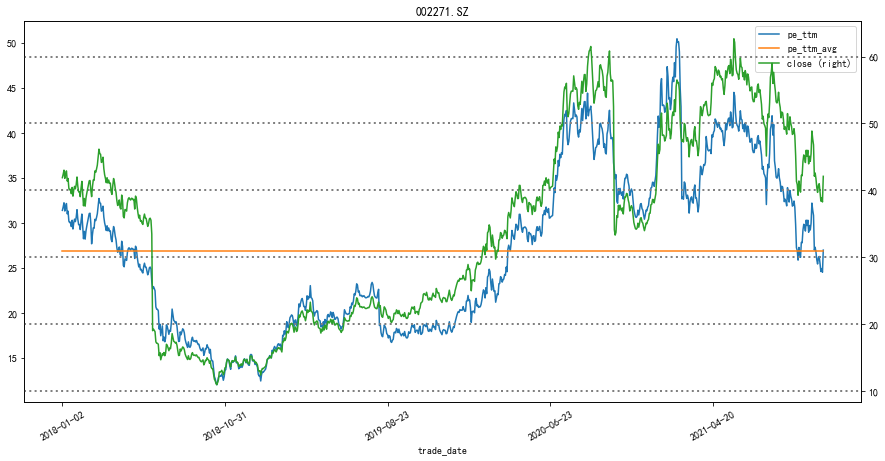

Empty DataFrame
Columns: [ts_code, close, pe_ttm, pe_ttm_avg]
Index: []


In [2]:
import tushare as ts 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from  datetime import datetime,date
import matplotlib.ticker as ticker
warnings.filterwarnings('ignore')
%matplotlib inline
# 这两行代码解决 plt 中文显示的问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

class Security_PE(object):
    def __init__(self,df):
        self.df = df 
        self.push_data()
        
    def push_data(self):
        self.df['trade_date']  = df.trade_date.apply(lambda x: datetime.strptime(x,'%Y%m%d'))
        self.df.set_index('trade_date',inplace=True)
        self.df.sort_index(inplace=True)
        self.df['pe_ttm_avg'] = self.df.pe_ttm.mean()
        str0 = self.df.iloc[0,0]
        str1 =  datetime.now().strftime("%Y-%m-%d")  #取当前日期
        self.df.to_csv(str0 +'-' +str1 + '_PE.csv') #存储文件 
        
    def plot(self,data):
        data['pe_ttm_avg'] = data['pe_ttm'].mean()
        data[['pe_ttm','pe_ttm_avg','close']].plot(figsize=(15,7),title=data.iloc[0,0],rot=30,secondary_y=['close'])  
        plt.grid(axis='y', color='gray', linestyle=':', linewidth=2)
        plt.savefig('PE.png')
        plt.show()
    def cal(self,data):
        
        data = data[data.index>'2020-01-01']
        print(data[data['close'] <14]) 
        

        
        
if __name__ == "__main__":
    pro = ts.pro_api()
    df = pro.query('daily_basic', ts_code='002271.SZ',start_date='20090101', end_date='20211111',fields='ts_code,trade_date,pe_ttm,close')   

    stock = Security_PE(df)
    str0 = df.iloc[0,0]
    str1 =  datetime.now().strftime("%Y-%m-%d")  #取当前日期
    data = pd.read_csv(str0 +'-' +str1 + '_PE.csv',index_col='trade_date')
    data = data.loc['2018-01-01':'2021-11-11']  #选取时间段
    stock.plot(data) 
    stock.cal(data)
    

# PB 

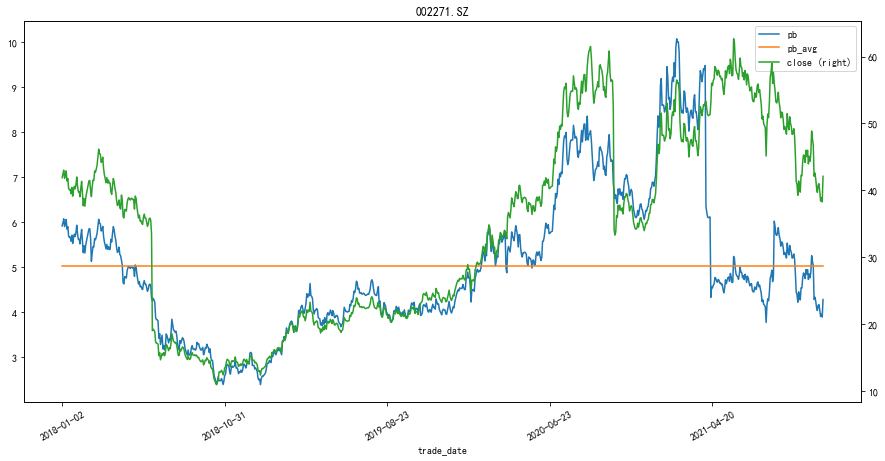

In [3]:
import tushare as ts 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from  datetime import datetime,date
warnings.filterwarnings('ignore')
%matplotlib inline

class Security_PB(object):
    def __init__(self,df):
        self.df = df 
        self.push_data()
        
    def push_data(self):
        self.df['trade_date']  = df.trade_date.apply(lambda x: datetime.strptime(x,'%Y%m%d'))
        self.df.set_index('trade_date',inplace=True)
        self.df.sort_index(inplace=True)
        self.df['pb_avg'] = self.df.pb.mean()
        str0 = self.df.iloc[0,0]
        str1 =  datetime.now().strftime("%Y-%m-%d")  #取当前日期
        self.df.to_csv(str0 +'-' +str1 + '_PB.csv') #存储文件 
        
    def plot(self,data):
        data['pb_avg'] = data['pb'].mean()
#         data[['pb','pb_avg']].plot(figsize=(15,7),title=data.iloc[0,0],rot=30)
        data[['pb','pb_avg','close']].plot(figsize=(15,7),title=data.iloc[0,0],rot=30,secondary_y=['close'])
        plt.savefig('PB.png')
        plt.show()
    def cal(self,data):
        
        data = data[data.index>'2021-01-01']
        print(data[data['close'] < 45])  
if __name__ == "__main__":    
    pro = ts.pro_api()
    df = pro.query('daily_basic', ts_code='002271.SZ',start_date='20090101', end_date='20211111',fields='ts_code,trade_date,pb,close')   

    stock = Security_PB(df)
  
    str0 = df.iloc[0,0]
    str1 =  datetime.now().strftime("%Y-%m-%d")  #取当前日期
    data = pd.read_csv(str0 +'-' +str1 + '_PB.csv',index_col='trade_date')
    data = data.loc['2018-01-01':'2021-11-11']  #选取时间段
    stock.plot(data) 
#     stock.cal(data)

# PS 

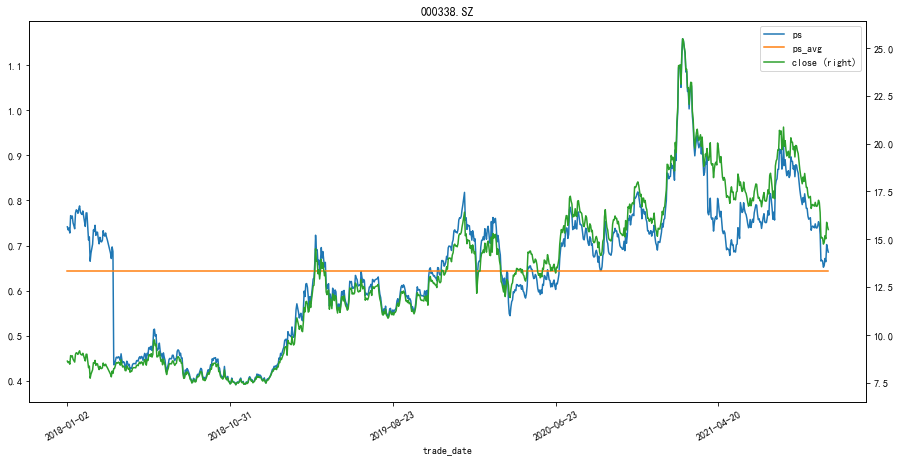

In [9]:
import tushare as ts 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from  datetime import datetime,date
warnings.filterwarnings('ignore')
%matplotlib inline

class Security_PS(object):
    def __init__(self,df):
        self.df = df 
        self.push_data()
        
    def push_data(self):
        self.df['trade_date']  = df.trade_date.apply(lambda x: datetime.strptime(x,'%Y%m%d'))
        self.df.set_index('trade_date',inplace=True)
        self.df.sort_index(inplace=True)
        self.df['ps_avg'] = self.df.ps.mean()
        str0 = self.df.iloc[0,0]
        str1 =  datetime.now().strftime("%Y-%m-%d")  #取当前日期
        self.df.to_csv(str0 +'-' +str1 + '_PS.csv') #存储文件 
        
    def plot(self,data):
        data['ps_avg'] = data['ps'].mean()
#         data[['pb','pb_avg']].plot(figsize=(15,7),title=data.iloc[0,0],rot=30)
        data[['ps','ps_avg','close']].plot(figsize=(15,7),title=data.iloc[0,0],rot=30,secondary_y=['close'])
        plt.savefig('PS.png')
        plt.show()
    def cal(self,data):
        
        data = data[data.index>'2021-01-01']
        print(data[data['close'] < 45])  
if __name__ == "__main__":    
    pro = ts.pro_api()
    df = pro.query('daily_basic', ts_code='000338.SZ',start_date='20090101', end_date='20211110',fields='ts_code,trade_date,ps,close')   

    stock = Security_PS(df)
  
    str0 = df.iloc[0,0]
    str1 =  datetime.now().strftime("%Y-%m-%d")  #取当前日期
    data = pd.read_csv(str0 +'-' +str1 + '_PS.csv',index_col='trade_date')
    data = data.loc['2018-01-01':'2021-11-10']  #选取时间段
    stock.plot(data) 
#     stock.cal(data)

# 成交量加权平均

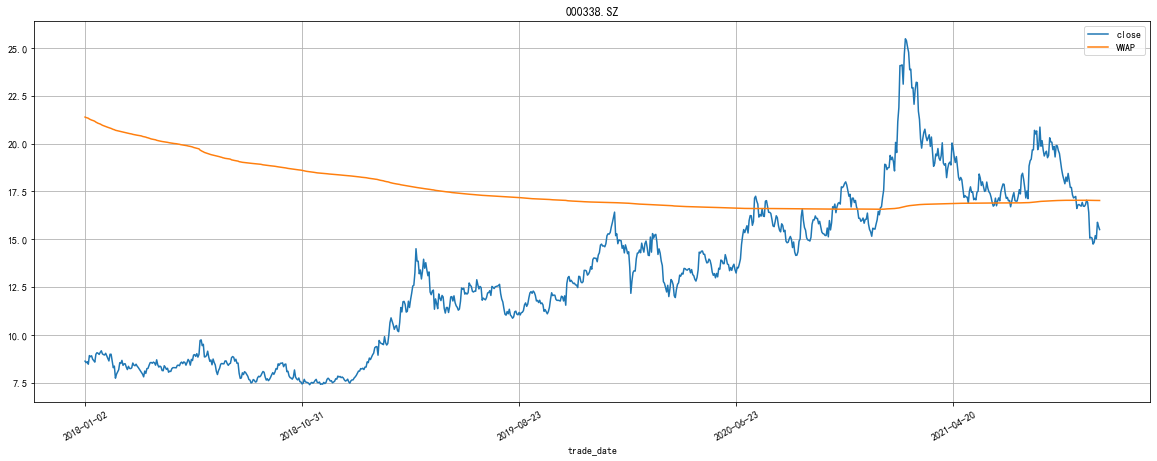

In [10]:
from  datetime import datetime,date
import tushare as ts 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

class Security_eva(object):
    def __init__(self,df):
        self.df = df 
        self.push_data()
        
    def push_data(self):
        self.df['trade_date']  = df.trade_date.apply(lambda x: datetime.strptime(x,'%Y%m%d'))
        self.df.set_index('trade_date',inplace=True)
        self.df.sort_index(inplace=True)
        self.df['Typical_Price'] = (df.high + df.low + df.close) / 3
        self.df['VP'] = df['Typical_Price'] * df['vol']
        self.df['Total_VP'] = df['VP'].cumsum()
        self.df['Total_V'] = df['vol'].cumsum()
        self.df['VWAP'] = df['Total_VP'] / df['Total_V']
        str0 = self.df.iloc[0,0]
        str1 =  datetime.now().strftime("%Y-%m-%d")  #取当前日期
        self.df.to_csv(str0 +'-' +str1 + '_kline.csv') #存储文件 
    def plot(self,data):
        data[['close','VWAP']].plot(figsize = (20,7),grid=True,title= data.iloc[0,0],rot=30)
        plt.savefig('VWAP.png')
        plt.show()
        
if __name__ == "__main__":
    pro = ts.pro_api()
    df = pro.daily(ts_code='000338.SZ', start_date='20090101', end_date='20211110')
    stock = Security_eva(df)
    str0 = df.iloc[0,0]
    str1 =  datetime.now().strftime("%Y-%m-%d")  #取当前日期
    data = pd.read_csv(str0 +'-' +str1 + '_kline.csv',index_col='trade_date') 
    data = data.loc['2018-01-01':'2021-11-10']  #选取时间段
    stock.plot(data)

In [15]:
%%html
<style>
div.input {
    display:none;
}
</style>